In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [14]:
proj_compare = {'energy_density':['fs_ktiso_projections_1_5_fm/fs/output/e_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/e_projection_1.500.dat'],
                'ux':['fs_ktiso_projections_1_5_fm/fs/output/ux_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/ux_projection_1.500.dat'],
                'pixx':['fs_ktiso_projections_1_5_fm/fs/output/pixx_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/pi_x_x_projection.dat'],
                'pixy':['fs_ktiso_projections_1_5_fm/fs/output/pixy_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/pi_x_y_projection.dat']}

In [15]:
proj_compare_2 = {'energy_density':['fs_ktiso_projections_1_5_fm/fs/output/e_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/e_projection_1.500.dat'],
                'ux':['fs_ktiso_projections_1_5_fm/fs/output/ux_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/ux_projection_1.500.dat'],
                'pixx':['fs_ktiso_projections_1_5_fm/fs/output/pixx_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/pi_x_x_projection.dat'],
                'pixy':['fs_ktiso_projections_1_5_fm/fs/output/pixy_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/pi_x_y_projection.dat'],
               'initial_energy_density':['fs_ktiso_projections_1_5_fm/fs/output/initial_e_projection.dat', 
                'fs_ktiso_projections_1_5_fm/ktiso/output/initial_e_projection.dat']}

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


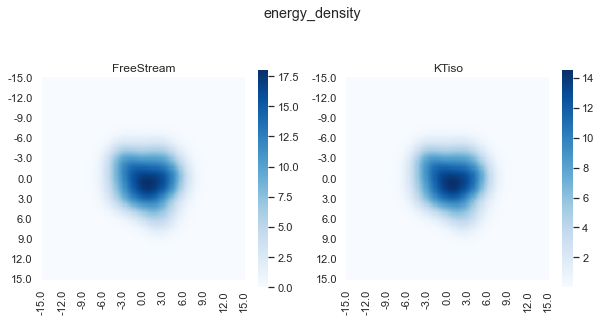

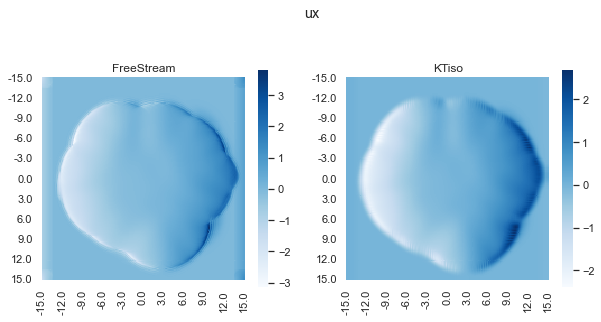

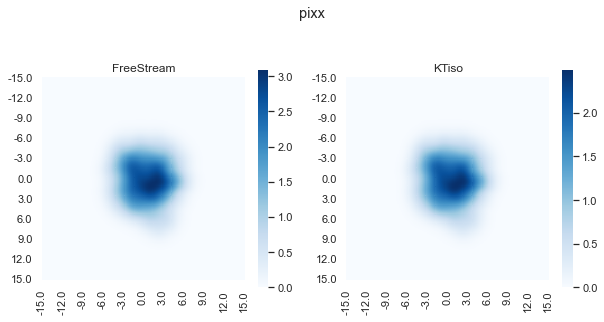

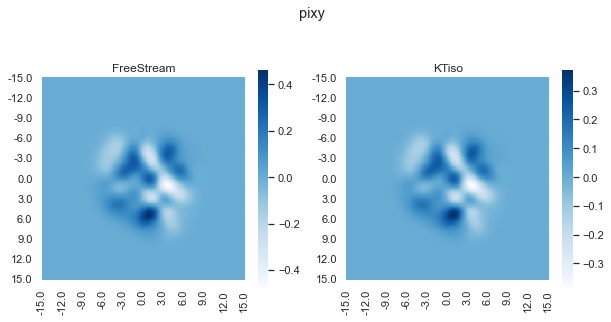

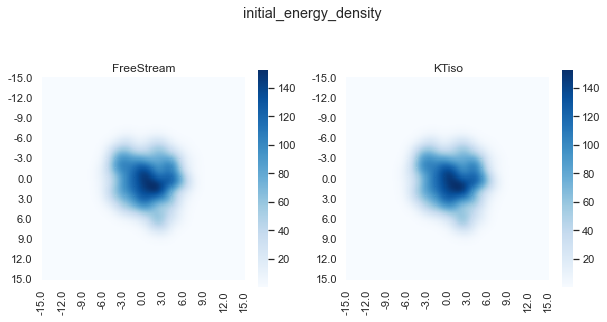

In [17]:
for lbl in proj_compare_2.keys():
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    for i, ax in enumerate(axs):
        f = np.fromfile(proj_compare_2[lbl][i], sep=" ")
        hbarc = 0.197326938
        if i==0 and lbl!='ux' and lbl!='initial_energy_density':
            f_re = hbarc*f.reshape(181,181)
        else:
            f_re = f.reshape(181,181)
        ax=sns.heatmap(f_re,ax=ax , square=True, cbar=True, cbar_kws={"shrink": .8}, cmap="Blues")
        settick=np.linspace(0,180,11)
        ticks=np.linspace(-15,15,11)
        ticks=np.round(ticks,1)
        ax.tick_params(axis='both')
        ax.set_yticks(settick)
        ax.set_xticks(settick)
        ax.set_xticklabels(ticks)
        ax.set_yticklabels(ticks)
        #ax.set_xlim(60,120)
        #ax.set_ylim(60,120)
        if i==0:
            ax.set_title('FreeStream')
        else:
            ax.set_title('KTiso')
    fig.suptitle(lbl)
fig.show()

## I need to scale the freestream energy densities and shear components by 1/2$\pi$ to get the same scale as the ktiso projections. I noticed there is a 1/2$\pi$ scaling happening when w_D = 0. Does this need to be changed?

In [47]:
plot_title = ['$|(\epsilon_{\\mathrm{kt}}-\epsilon_{\\mathrm{fs}})/\epsilon_{\\mathrm{kt}}|$',
             '$|(u^{x}_{\\mathrm{kt}}-u^{x}_{\\mathrm{fs}})/u^{x}_{\\mathrm{kt}}|$',
             '$|(\pi^{xx}_{\\mathrm{kt}}-\pi^{xx}_{\\mathrm{fs}})/\pi^{xx}_{\\mathrm{kt}}|$',
             '$|(\pi^{xy}_{\\mathrm{kt}}-\pi^{xy}_{\\mathrm{fs}})/\pi^{xy}_{\\mathrm{kt}}|$']

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


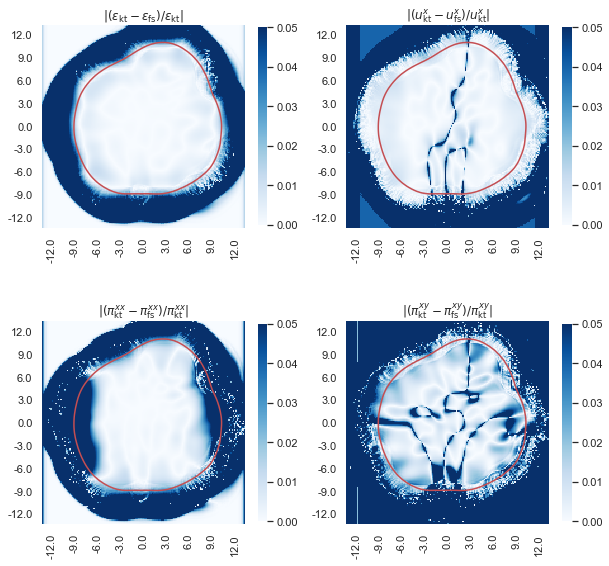

In [67]:
fig,axs=plt.subplots(2,2,figsize=(10,10))

e_fs = np.fromfile(proj_compare['energy_density'][0], sep=" ")
e_fs = e_fs.reshape(181,181)
x_points= np.linspace(0,180,181)
X,Y=np.meshgrid(x_points,x_points)
    
for i,lbl in enumerate(proj_compare.keys()):
    
    f_fs = np.fromfile(proj_compare[lbl][0], sep=" ")
    if i in [0,2,3]:
        hbarc = 0.197326938
        f_fs = f_fs.reshape(181,181)/(2*np.pi)
    else:
        f_fs = f_fs.reshape(181,181)
    
    f_kt = np.fromfile(proj_compare[lbl][1], sep=" ")
    f_kt = f_kt.reshape(181,181)
    #f_kt = np.roll(f_kt,2,axis=[1])
    f_re = np.abs(np.divide(f_fs-f_kt,f_kt))
    ax= axs.flatten()[i]
    ax=sns.heatmap(f_re,ax=ax , square=True, cbar=True, cbar_kws={"shrink": .8}, cmap="Blues", vmin=0, vmax=0.05)
    settick=np.linspace(0,180,11)
    ticks=np.linspace(-15,15,11)
    ticks=np.round(ticks,1)
    ax.tick_params(axis='both')
    ax.set_yticks(settick)
    ax.set_xticks(settick)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    ax.set_xlim(10,170)
    ax.set_ylim(10,170)
    ax.set_title(plot_title[i])
    ax.contour(e_fs,[0.1],colors='r')
fig.show()